<a href="https://colab.research.google.com/github/Diego-II/Assignment2-WebDev/blob/master/JuegoDiego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m pip install dask[dataframe]
!python -m pip install dask[array]

     |████████████████████████████████| 92kB 3.7MB/s 
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=83a8e872ee71058a0da5ac805898182de58797de46ddcd9b84538191522dc177
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
Successfully built locket


In [2]:
import time
start_time = time.time()

import os

import numpy as np

import pandas as pd
import dask.dataframe as dd
import dask.array as da

import matplotlib.pyplot as plt
import seaborn as sns

print("--- %s seconds ---" % (time.time() - start_time))

--- 1.8148832321166992 seconds ---


In [3]:
from google.colab import files
Diego = True
if Diego:
  from google.colab import drive
  drive.mount('/content/drive')
!pwd

Mounted at /content/drive
/content


In [6]:
!unzip drive/MyDrive/Proyecto\ Cencosud/Proyecto_UdeChile_Datos.zip

Archive:  drive/MyDrive/Proyecto Cencosud/Proyecto_UdeChile_Datos.zip
 extracting: Tablas_Diccionario.xlsx  
 extracting: TABLA_FACTURACIONES.txt  
 extracting: TABLA_R04.txt           
 extracting: TABLA_PAGOS.txt         
 extracting: Variables_Comportamiento_202009.txt  
 extracting: Variables_Comportamiento_202008.txt  
 extracting: Variables_Comportamiento_202007.txt  


In [7]:
#Había valores en "BI_DEUTOT" que eran string con comas, como '52201649,84'. Las computaciones tiraban un error
#Para esto se crea esta función que lo trunca y lo pasa a uno de tipo int

def transform_exceptions(x):
    if type(x) == str:
        x = x.replace(",", ".")
        x = int(float(x)) 
        return x

In [8]:
%time fact = pd.read_csv("TABLA_FACTURACIONES.txt", sep = "\t", converters = {"BI_DEUTOT" : transform_exceptions})
try:
  %time r_04_resumen = pd.read_csv("/content/drive/MyDrive/Proyecto Cencosud/R04_resumen.csv")
except:
  print('R_04_resumen.csv no existe')


CPU times: user 5.73 s, sys: 710 ms, total: 6.44 s
Wall time: 12.4 s
CPU times: user 8.89 s, sys: 1.12 s, total: 10 s
Wall time: 12.7 s


In [9]:
r_04_resumen.set_index('ID_CLIENTE', inplace=True)

In [ ]:
fact.columns

Index(['ID_CLIENTE', 'ID_CUENTA', 'PERIODO', 'BI_DEUTOT', 'deuda_facturada',
       'BI_PAGMIN', 'facturacion', 'vcto', 'facturacion_2', 'vcto_2',
       'mora_periodo2', 'paga_minimo_antes_vcto_8',
       'paga_minimo_antes_vcto_10', 'paga_minimo_antes_vcto_12',
       'pagos_vcto_8', 'pagos_vcto_10', 'pagos_vcto_12'],
      dtype='object')

In [ ]:
print('Cantidad de ID de clientes distintos = {}'.format(len(fact.ID_CLIENTE.unique())))

Cantidad de ID de clientes distintos = 759015


In [ ]:
fact.describe().T

,count,mean,std,min,25%,50%,75%,max
PERIODO,1664149.0,2.020042e+05,2.478138e+00,202001.0,202002.0,202004.0,202006.0,202008.0
BI_DEUTOT,1664149.0,1.257001e+06,2.113003e+06,1.0,175852.0,454092.0,1328625.0,59394683.0
deuda_facturada,1664149.0,2.461764e+05,4.587619e+05,0.0,60874.0,125270.0,262796.0,70155823.0
BI_PAGMIN,1664149.0,9.497667e+04,1.369670e+05,0.0,23885.0,52712.0,114043.0,15120605.0
mora_periodo2,1664149.0,5.007584e+00,7.069200e+00,0.0,0.0,0.0,13.0,79.0
paga_minimo_antes_vcto_8,1664149.0,4.365138e-01,4.959533e-01,0.0,0.0,0.0,1.0,1.0
paga_minimo_antes_vcto_10,1664149.0,4.749136e-01,4.993704e-01,0.0,0.0,0.0,1.0,1.0
paga_minimo_antes_vcto_12,1664149.0,5.431978e-01,4.981306e-01,0.0,0.0,1.0,1.0,1.0
pagos_vcto_8,1664149.0,8.124344e+04,1.965045e+05,0.0,0.0,0.0,100000.0,18798561.0
pagos_vcto_10,1664149.0,8.816492e+04,2.057434e+05,0.0,0.0,10526.0,108396.0,18798561.0


Las columnas `['ID_CLIENTE', 'ID_CUENTA']` seran los indices del dataframe:

In [ ]:
fact.set_index(['ID_CLIENTE', 'ID_CUENTA'],inplace=True)

In [ ]:
fact[:10]

,,PERIODO,BI_DEUTOT,deuda_facturada,BI_PAGMIN,facturacion,vcto,facturacion_2,vcto_2,mora_periodo2,paga_minimo_antes_vcto_8,paga_minimo_antes_vcto_10,paga_minimo_antes_vcto_12,pagos_vcto_8,pagos_vcto_10,pagos_vcto_12
ID_CLIENTE,ID_CUENTA,,,,,,,,,,,,,,,
24CD2D38C24771031C4683EE53D8D4FE,1757D8D3464332A08EB57CBE2B585CD1EDF0C605544E38751A290E8E5BECD918,202001,34734,34734,18621,2020-01-15,2020-02-03,2020-02-17,2020-03-03,0,1,1,1,34740,34740,34740
7CE90FDF1EDD1B4205C348EA310086AC,30E44B9681F3695441E34750B35C357ACA726D05FB561B95469ED008448897F8,202007,47418,37176,12932,2020-07-30,2020-08-12,2020-08-25,2020-09-08,13,0,0,0,0,0,0
0726D0675FE5654330275EE5EED4DC8A,46BF6B6204D9171A2BD6AB5F6A33E5EF665BBE29EBC46FFC6B5F190E97C57CA0,202008,161610,48603,25944,2020-08-10,2020-08-25,2020-09-08,2020-09-24,0,1,1,1,48603,48603,48603
9D35993FD88A15D8EB6D0FA210BC60CF,640C1E2BB60FDD40BCDEF4D14BDEA40840DF2601F10A0B8A838FC69AB86AB005,202001,61822,38647,21244,2020-01-09,2020-01-23,2020-02-10,2020-02-24,0,1,1,1,38650,38650,38650
A59BE430BA99EBBE5A8F7C6DB2375D4E,761533608E6408F8147243033919BB6E39BBEE79AB7F818B1952BDEFEAC218DC,202006,428423,428423,87989,2020-06-11,2020-07-01,2020-07-14,2020-08-03,0,1,1,1,428430,428430,428430
047983BDE838BF5CD0289F4BCC827E4F,4F7AFC5201CF4587BF2E5F624192C0EC8FBDD0429C02341853FEA5442F80F7A3,202001,1120473,71727,71175,2020-01-22,2020-02-06,2020-02-19,2020-03-05,13,0,0,0,0,0,0
E4B2DBC3DDA63411345DC04D26EED35A,DDAB68B343D22EC048C501B550C5D10751EF33D4672980A048099FFAC831BF77,202002,110525,40595,17737,2020-02-11,2020-02-25,2020-03-11,2020-03-26,0,0,0,0,0,0,0
3D1CF23E888D2A3D45F36405DC39B275,A6FCD63798A79D35C6477747CD030FB7B1CE7C9459F3F9F9F92FB7DF5034B044,202002,279006,156309,52348,2020-02-11,2020-02-26,2020-03-11,2020-03-26,0,0,0,0,0,0,0
B2AF8FF89EA781338AACD0A257B28917,5B4821AB9308836AA62E30793EC631CE315ED540C9FFBE34E4799942018DF784,202008,3816600,175113,174492,2020-08-19,2020-09-03,2020-09-22,2020-10-07,0,1,1,1,175113,175113,175113


In [ ]:
fact.PERIODO[:10].values

array([202001, 202007, 202008, 202001, 202006, 202001, 202002, 202002,
       202008, 202006])

La columna periodos se va a transformar a un datetime de pandas. En primer lugar, los periodos estan escritos de la siguiente forma: 
```
202001 -> Enero 2020
202002 -> Febrero 2020
...
```

Se dejara como periodo el `pd.Timestamp` correspondiente al dia 1, hora 12 de cada mes correspondiente.

In [ ]:
h = 'holo'
print(h[-1])

o


In [ ]:
def int2periodo(num):
  per = str(num)[-1]
  return pd.Timestamp(year=2020, month=int(per), day=1, hour=12)

In [ ]:
holo = fact.PERIODO[:10].values
for num in holo:
  print(int2periodo(num))


2020-01-01 12:00:00
2020-07-01 12:00:00
2020-08-01 12:00:00
2020-01-01 12:00:00
2020-06-01 12:00:00
2020-01-01 12:00:00
2020-02-01 12:00:00
2020-02-01 12:00:00
2020-08-01 12:00:00
2020-06-01 12:00:00


In [ ]:
fact['PERIODO'] = fact['PERIODO'].apply(int2periodo)

Verifiquemos que queda segun lo deseado:

In [ ]:
fact['PERIODO'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                 1664149
unique                      8
top       2020-01-01 12:00:00
freq                   313472
first     2020-01-01 12:00:00
last      2020-08-01 12:00:00
Name: PERIODO, dtype: object

In [ ]:
fact[['facturacion', 'vcto', 'facturacion_2', 'vcto_2']][:10]

,,facturacion,vcto,facturacion_2,vcto_2
ID_CLIENTE,ID_CUENTA,,,,
24CD2D38C24771031C4683EE53D8D4FE,1757D8D3464332A08EB57CBE2B585CD1EDF0C605544E38751A290E8E5BECD918,2020-01-15,2020-02-03,2020-02-17,2020-03-03
7CE90FDF1EDD1B4205C348EA310086AC,30E44B9681F3695441E34750B35C357ACA726D05FB561B95469ED008448897F8,2020-07-30,2020-08-12,2020-08-25,2020-09-08
0726D0675FE5654330275EE5EED4DC8A,46BF6B6204D9171A2BD6AB5F6A33E5EF665BBE29EBC46FFC6B5F190E97C57CA0,2020-08-10,2020-08-25,2020-09-08,2020-09-24
9D35993FD88A15D8EB6D0FA210BC60CF,640C1E2BB60FDD40BCDEF4D14BDEA40840DF2601F10A0B8A838FC69AB86AB005,2020-01-09,2020-01-23,2020-02-10,2020-02-24
A59BE430BA99EBBE5A8F7C6DB2375D4E,761533608E6408F8147243033919BB6E39BBEE79AB7F818B1952BDEFEAC218DC,2020-06-11,2020-07-01,2020-07-14,2020-08-03
047983BDE838BF5CD0289F4BCC827E4F,4F7AFC5201CF4587BF2E5F624192C0EC8FBDD0429C02341853FEA5442F80F7A3,2020-01-22,2020-02-06,2020-02-19,2020-03-05
E4B2DBC3DDA63411345DC04D26EED35A,DDAB68B343D22EC048C501B550C5D10751EF33D4672980A048099FFAC831BF77,2020-02-11,2020-02-25,2020-03-11,2020-03-26
3D1CF23E888D2A3D45F36405DC39B275,A6FCD63798A79D35C6477747CD030FB7B1CE7C9459F3F9F9F92FB7DF5034B044,2020-02-11,2020-02-26,2020-03-11,2020-03-26
B2AF8FF89EA781338AACD0A257B28917,5B4821AB9308836AA62E30793EC631CE315ED540C9FFBE34E4799942018DF784,2020-08-19,2020-09-03,2020-09-22,2020-10-07


In [ ]:
columnas_fechas = ['facturacion', 'vcto', 'facturacion_2', 'vcto_2']
for col in columnas_fechas:
  fact[col] = pd.to_datetime(fact[col], format='%Y-%m-%d')

fact[columnas_fechas][:10]

,,facturacion,vcto,facturacion_2,vcto_2
ID_CLIENTE,ID_CUENTA,,,,
24CD2D38C24771031C4683EE53D8D4FE,1757D8D3464332A08EB57CBE2B585CD1EDF0C605544E38751A290E8E5BECD918,2020-01-15,2020-02-03,2020-02-17,2020-03-03
7CE90FDF1EDD1B4205C348EA310086AC,30E44B9681F3695441E34750B35C357ACA726D05FB561B95469ED008448897F8,2020-07-30,2020-08-12,2020-08-25,2020-09-08
0726D0675FE5654330275EE5EED4DC8A,46BF6B6204D9171A2BD6AB5F6A33E5EF665BBE29EBC46FFC6B5F190E97C57CA0,2020-08-10,2020-08-25,2020-09-08,2020-09-24
9D35993FD88A15D8EB6D0FA210BC60CF,640C1E2BB60FDD40BCDEF4D14BDEA40840DF2601F10A0B8A838FC69AB86AB005,2020-01-09,2020-01-23,2020-02-10,2020-02-24
A59BE430BA99EBBE5A8F7C6DB2375D4E,761533608E6408F8147243033919BB6E39BBEE79AB7F818B1952BDEFEAC218DC,2020-06-11,2020-07-01,2020-07-14,2020-08-03
047983BDE838BF5CD0289F4BCC827E4F,4F7AFC5201CF4587BF2E5F624192C0EC8FBDD0429C02341853FEA5442F80F7A3,2020-01-22,2020-02-06,2020-02-19,2020-03-05
E4B2DBC3DDA63411345DC04D26EED35A,DDAB68B343D22EC048C501B550C5D10751EF33D4672980A048099FFAC831BF77,2020-02-11,2020-02-25,2020-03-11,2020-03-26
3D1CF23E888D2A3D45F36405DC39B275,A6FCD63798A79D35C6477747CD030FB7B1CE7C9459F3F9F9F92FB7DF5034B044,2020-02-11,2020-02-26,2020-03-11,2020-03-26
B2AF8FF89EA781338AACD0A257B28917,5B4821AB9308836AA62E30793EC631CE315ED540C9FFBE34E4799942018DF784,2020-08-19,2020-09-03,2020-09-22,2020-10-07


Para efecto de este "juego", el objetivo sera predecir  `['paga_minimo_antes_vcto_8','paga_minimo_antes_vcto_10', 'paga_minimo_antes_vcto_12']`, que ya se encuentra codificada como `OneHot`.

Cruzaremos con la tabla `R04`:

In [ ]:
r_04 = dd.read_csv("TABLA_R04.txt", sep = "\t")

In [ ]:
r_04 = r_04.set_index('ID_CLIENTE')

In [ ]:
r_04.head(10)

,DMORA_202008,DVENC_202008,DCAST_202008,COMERCIA_202008,CONSUMO_202008,LCDISP_202008,DMORA_202007,DVENC_202007,DCAST_202007,COMERCIA_202007,CONSUMO_202007,LCDISP_202007,DMORA_202006,DVENC_202006,DCAST_202006,COMERCIA_202006,CONSUMO_202006,LCDISP_202006,DMORA_202005,DVENC_202005,DCAST_202005,COMERCIA_202005,CONSUMO_202005,LCDISP_202005,DMORA_202004,DVENC_202004,DCAST_202004,COMERCIA_202004,CONSUMO_202004,LCDISP_202004,DMORA_202003,DVENC_202003,DCAST_202003,COMERCIA_202003,CONSUMO_202003,LCDISP_202003,DMORA_202002,DVENC_202002,DCAST_202002,COMERCIA_202002,CONSUMO_202002,LCDISP_202002,DMORA_202001,DVENC_202001,DCAST_202001,COMERCIA_202001,CONSUMO_202001,LCDISP_202001,DMORA_201912,DVENC_201912,DCAST_201912,COMERCIA_201912,CONSUMO_201912,LCDISP_201912,DMORA_201911,DVENC_201911,DCAST_201911,COMERCIA_201911,CONSUMO_201911,LCDISP_201911,DMORA_201910,DVENC_201910,DCAST_201910,COMERCIA_201910,CONSUMO_201910,LCDISP_201910,DMORA_201909,DVENC_201909,DCAST_201909,COMERCIA_201909,CONSUMO_201909,LCDISP_201909,DMORA_201908,DVENC_201908,DCAST_201908,COMERCIA_201908,CONSUMO_201908,LCDISP_201908,DMORA_201907,DVENC_201907,DCAST_201907,COMERCIA_201907,CONSUMO_201907,LCDISP_201907
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000001E51A1011494209D8C4DB4716C2,0,0,0,0,433,255,0,0,0,0,531,230,0,0,0,0,519,80,0,0,0,0,573,100,0,0,0,0,531,179,0,0,0,0,554,157,0,0,0,0,580,139,0,0,0,0,546,58,0,0,0,0,586,26,0,0,0,0,719,0,0,0,0,0,674,0,0,0,0,0,690,0,0,0,0,0,301,302,0,0,0,0,349,0
000002245B2B68B50359B904C23D2365,0,0,0,0,3873,765,0,0,0,0,4061,735,0,0,0,0,4247,704,0,0,0,0,4450,656,0,0,0,0,4655,598,0,0,0,0,4880,545,0,0,0,0,5008,567,0,0,0,0,5201,540,0,0,0,0,5484,388,0,0,0,0,5732,313,0,0,0,0,5902,256,0,0,0,0,5975,322,0,0,0,0,6217,222,0,0,0,0,6234,345
000005EEBEFDE747E747519CA246CFD1,0,0,0,99889,0,25447,0,0,0,100822,0,25005,0,0,0,101347,0,24414,0,0,0,102295,0,23505,0,0,0,104649,0,28081,0,0,0,118903,0,14150,0,0,0,115124,0,17878,0,0,0,109819,0,22366,0,0,0,7126,0,25682,0,0,0,7223,0,25808,0,0,0,9584,0,18627,0,0,0,21385,0,11343,0,0,0,21364,0,6973,0,0,0,19509,0,8866
000006F2AA373BEDC3B49384403D9178,0,0,0,0,1089,0,0,0,0,0,1182,0,0,0,0,0,1275,0,0,0,0,0,1533,0,0,0,0,0,1635,0,0,0,0,0,1715,0,0,0,0,0,1698,0,0,0,0,0,1799,0,0,0,0,0,1899,0,0,0,0,0,1991,0,0,0,0,0,2085,0,0,0,0,0,2075,0,0,0,0,0,2096,0,0,0,0,0,2093,0
00000802B59FC6DE7BD6A78172417FEF,0,0,0,0,9,526,0,0,0,0,5,531,0,0,0,0,0,536,0,0,0,0,0,537,0,0,0,0,0,538,0,0,0,0,0,536,0,0,0,0,0,536,0,0,0,0,0,534,0,0,0,0,0,537,0,0,0,0,0,534,0,0,0,0,0,534,0,0,0,0,0,534,0,0,0,0,0,533,0,0,0,0,31,501
00000D212034E256075E63E443F316BA,0,0,0,0,1157,23513,0,0,0,0,1223,23239,0,0,0,0,1364,25336,0,0,0,0,1229,25402,0,0,0,0,1251,25521,0,0,0,0,1424,25432,0,0,0,0,1589,25365,0,0,0,0,1690,24221,0,0,0,0,2123,23563,0,0,0,0,1049,24389,0,0,0,0,160,25195,0,0,0,0,52,20640,0,0,0,0,346,19925,0,0,0,0,72,19465
00000D2A35C2C4DF640A9888A969BC1B,0,0,0,0,305,8602,0,0,0,0,422,8425,0,0,0,0,354,8692,0,0,0,0,247,8752,0,0,0,0,314,8774,0,0,0,0,438,8711,0,0,0,0,1868,7165,0,0,0,0,1656,7328,0,0,0,0,2598,6276,0,0,469,0,2854,6659,0,0,469,0,3179,6097,0,0,469,0,2888,6361,0,0,469,0,3218,6026,0,0,469,0,2545,6588
00000D47494DEAB28F7D6A4C0564EC5A,0,0,2922,0,2922,0,0,0,2922,0,2922,0,0,0,2922,0,2922,0,0,0,2922,0,2922,0,0,0,2922,0,2922,0,110,182,2615,0,2961,0,110,683,0,0,2953,0,110,531,0,0,2912,0,114,381,0,0,2870,0,335,0,0,0,2834,0,189,0,0,0,2791,0,0,0,0,0,2749,0,0,0,0,0,2710,0,0,0,0,0,2367,0
00000D8BE7ABCB21F1F70B662C748480,0,0,2153,0,3169,0,1333,0,2173,0,3506,0,1491,0,2198,0,3689,0,1642,0,2198,0,3840,0,1795,0,2218,0,4013,0,2161,87,1930,0,4178,0,2155,55,1930,0,4325,0,62,25,1930,0,2233,0,55,0,2486,0,2783,0,25,0,6321,0,6603,0,10,0,25375,0,25654,0,0,0,25375,0,25632,0,0,0,25375,0,25620,0,0,0,25375,0,25703,0


In [ ]:
print('Cantidad filas en tabla R_04 = {}'.format(len(r_04)))

Cantidad filas en tabla R_04 = 6409732


In [ ]:
r_04_columns = list(r_04.columns)
r_04_columns[:7]

['DMORA_202008',
 'DVENC_202008',
 'DCAST_202008',
 'COMERCIA_202008',
 'CONSUMO_202008',
 'LCDISP_202008',
 'DMORA_202007']

In [ ]:
d_mora = [x for x in r_04_columns if 'DMORA' in x]
d_venc = [x for x in r_04_columns if 'DVENC' in x]
d_cast = [x for x in r_04_columns if 'DCAST' in x]
comercia = [x for x in r_04_columns if 'COMERCIA' in x]
consumo = [x for x in r_04_columns if 'CONSUMO' in x]
lcdisp = [x for x in r_04_columns if 'LCDISP' in x]
lista_columnas = {'d_mora' : d_mora,
                  'd_venc': d_venc,
                  'd_cast': d_cast,
                  'comercia':  comercia,
                  'consumo': consumo,
                  'lcdisp': lcdisp
                  }
                  

In [ ]:
r_04_resumen = pd.DataFrame()
for k, val in lista_columnas.items():
  r_04_resumen[k] = r_04[val].mean(axis=1).compute()

In [ ]:
r_04_resumen.columns

Index(['d_mora', 'd_venc', 'd_cast', 'comercia', 'consumo', 'lcdisp'], dtype='object')

In [ ]:
r_04_resumen[:10]

,d_mora,d_venc,d_cast,comercia,consumo,lcdisp
ID_CLIENTE,,,,,,
000001E51A1011494209D8C4DB4716C2,0.000000,0.000000,0.000000,0.000000,541.857143,109.000000
000002245B2B68B50359B904C23D2365,0.000000,0.000000,0.000000,0.000000,5137.071429,496.857143
000005EEBEFDE747E747519CA246CFD1,0.000000,0.000000,0.000000,67074.214286,0.000000,19867.500000
000006F2AA373BEDC3B49384403D9178,0.000000,0.000000,0.000000,0.000000,1726.071429,0.000000
00000802B59FC6DE7BD6A78172417FEF,0.000000,0.000000,0.000000,0.000000,3.214286,531.928571
00000D212034E256075E63E443F316BA,0.000000,0.000000,0.000000,0.000000,1052.071429,23657.571429
00000D2A35C2C4DF640A9888A969BC1B,0.000000,0.000000,167.500000,0.000000,1634.714286,7461.142857
00000D47494DEAB28F7D6A4C0564EC5A,69.142857,126.928571,1230.357143,0.000000,2839.785714,0.000000
00000D8BE7ABCB21F1F70B662C748480,766.357143,11.928571,9074.071429,0.000000,10067.714286,0.000000


In [ ]:
len(r_04_resumen)

6409732

In [ ]:
# guardemos el df para que no lo tengamos que computar cada vez:
path_to_drive = '/content/drive/MyDrive/Proyecto Cencosud/R04_resumen.csv'
r_04_resumen.to_csv(path_or_buf=path_to_drive, index=True)

In [ ]:
%time df_unido = fact.join(r_04_resumen, how='inner')

CPU times: user 5.46 s, sys: 102 ms, total: 5.56 s
Wall time: 5.57 s


In [ ]:
len(df_unido)

1388915

In [ ]:
df_unido.columns

Index(['PERIODO', 'BI_DEUTOT', 'deuda_facturada', 'BI_PAGMIN', 'facturacion',
       'vcto', 'facturacion_2', 'vcto_2', 'mora_periodo2',
       'paga_minimo_antes_vcto_8', 'paga_minimo_antes_vcto_10',
       'paga_minimo_antes_vcto_12', 'pagos_vcto_8', 'pagos_vcto_10',
       'pagos_vcto_12', 'd_mora', 'd_venc', 'd_cast', 'comercia', 'consumo',
       'lcdisp'],
      dtype='object')

In [ ]:
df_unido['target'] = df_unido[['paga_minimo_antes_vcto_8', 'paga_minimo_antes_vcto_10',
       'paga_minimo_antes_vcto_12']].sum(axis=1)

In [ ]:
df_unido[:5]

,,PERIODO,BI_DEUTOT,deuda_facturada,BI_PAGMIN,facturacion,vcto,facturacion_2,vcto_2,mora_periodo2,paga_minimo_antes_vcto_8,paga_minimo_antes_vcto_10,paga_minimo_antes_vcto_12,pagos_vcto_8,pagos_vcto_10,pagos_vcto_12,d_mora,d_venc,d_cast,comercia,consumo,lcdisp,target
ID_CLIENTE,ID_CUENTA,,,,,,,,,,,,,,,,,,,,,,
24CD2D38C24771031C4683EE53D8D4FE,1757D8D3464332A08EB57CBE2B585CD1EDF0C605544E38751A290E8E5BECD918,2020-01-01 12:00:00,34734,34734,18621,2020-01-15,2020-02-03,2020-02-17,2020-03-03,0,1,1,1,34740,34740,34740,3.357143,0.000000,0.000000,0.000000,135.785714,261.214286,3
7CE90FDF1EDD1B4205C348EA310086AC,30E44B9681F3695441E34750B35C357ACA726D05FB561B95469ED008448897F8,2020-07-01 12:00:00,47418,37176,12932,2020-07-30,2020-08-12,2020-08-25,2020-09-08,13,0,0,0,0,0,0,24.785714,0.000000,0.000000,0.000000,1846.500000,1635.928571,0
9D35993FD88A15D8EB6D0FA210BC60CF,640C1E2BB60FDD40BCDEF4D14BDEA40840DF2601F10A0B8A838FC69AB86AB005,2020-01-01 12:00:00,61822,38647,21244,2020-01-09,2020-01-23,2020-02-10,2020-02-24,0,1,1,1,38650,38650,38650,0.000000,0.000000,0.000000,0.000000,3537.214286,1311.500000,3
A59BE430BA99EBBE5A8F7C6DB2375D4E,761533608E6408F8147243033919BB6E39BBEE79AB7F818B1952BDEFEAC218DC,2020-06-01 12:00:00,428423,428423,87989,2020-06-11,2020-07-01,2020-07-14,2020-08-03,0,1,1,1,428430,428430,428430,0.000000,0.000000,0.000000,2243.928571,1503.071429,1621.357143,3
047983BDE838BF5CD0289F4BCC827E4F,4F7AFC5201CF4587BF2E5F624192C0EC8FBDD0429C02341853FEA5442F80F7A3,2020-01-01 12:00:00,1120473,71727,71175,2020-01-22,2020-02-06,2020-02-19,2020-03-05,13,0,0,0,0,0,0,14.785714,16.357143,377.571429,1680.357143,3970.571429,1044.571429,0


In [ ]:
cols_to_drop = ['paga_minimo_antes_vcto_8', 'paga_minimo_antes_vcto_10', 
                'paga_minimo_antes_vcto_12', 'facturacion', 'vcto', 'facturacion_2', 'vcto_2', 'PERIODO']
df_final = df_unido.drop(labels=cols_to_drop, axis=1)
df_final.dropna(axis=0, inplace=True)

In [ ]:
df_final.head()

,,BI_DEUTOT,deuda_facturada,BI_PAGMIN,mora_periodo2,pagos_vcto_8,pagos_vcto_10,pagos_vcto_12,d_mora,d_venc,d_cast,comercia,consumo,lcdisp,target
ID_CLIENTE,ID_CUENTA,,,,,,,,,,,,,,
24CD2D38C24771031C4683EE53D8D4FE,1757D8D3464332A08EB57CBE2B585CD1EDF0C605544E38751A290E8E5BECD918,34734,34734,18621,0,34740,34740,34740,3.357143,0.000000,0.000000,0.000000,135.785714,261.214286,3
7CE90FDF1EDD1B4205C348EA310086AC,30E44B9681F3695441E34750B35C357ACA726D05FB561B95469ED008448897F8,47418,37176,12932,13,0,0,0,24.785714,0.000000,0.000000,0.000000,1846.500000,1635.928571,0
9D35993FD88A15D8EB6D0FA210BC60CF,640C1E2BB60FDD40BCDEF4D14BDEA40840DF2601F10A0B8A838FC69AB86AB005,61822,38647,21244,0,38650,38650,38650,0.000000,0.000000,0.000000,0.000000,3537.214286,1311.500000,3
A59BE430BA99EBBE5A8F7C6DB2375D4E,761533608E6408F8147243033919BB6E39BBEE79AB7F818B1952BDEFEAC218DC,428423,428423,87989,0,428430,428430,428430,0.000000,0.000000,0.000000,2243.928571,1503.071429,1621.357143,3
047983BDE838BF5CD0289F4BCC827E4F,4F7AFC5201CF4587BF2E5F624192C0EC8FBDD0429C02341853FEA5442F80F7A3,1120473,71727,71175,13,0,0,0,14.785714,16.357143,377.571429,1680.357143,3970.571429,1044.571429,0


In [ ]:
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df_final, test_size=0.3)
X_train = train.drop(labels = 'target',axis=1)

In [ ]:
y_train = train['target']

In [ ]:
X = X_train
y = y_train
clf = GaussianNB()
clf.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
X_test = test.drop(labels='target',axis=1)
y_test = test['target']
preds_clf = clf.predict(X_test)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

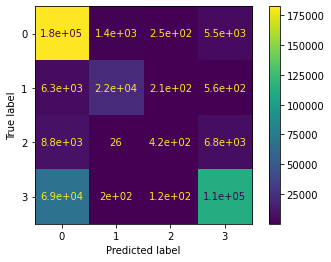

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [ ]:
clf = RandomForestClassifier(min_samples_leaf=20, n_jobs=-1, verbose=2)
clf.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.5min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=2,
                       warm_start=False)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.6s finished


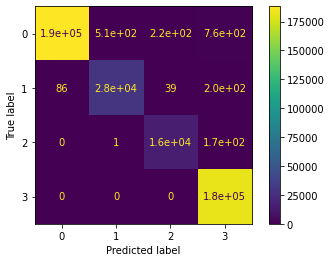

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()